# PEI

In [1]:
import numpy as np
import pandas as pd
import pandas_profiling

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('data-raw/PEI_Beneficiarios_2009-2017 (1).xlsx', skiprows=[0,1])
print(df.columns)
df.head()

Index(['NUM. DE PROYECTO', 'CONVOCATORIA', 'EMPRESA', 'ENTIDAD DEL PROYECTO',
       'TAMAÑO DE EMPRESA', 'MODALIDAD', 'TÍTULO DEL PROYECTO',
       'AREA INDUSTRIAL', 'SUBSECTOR', 'MONTO TOTAL VINCULACION',
       'COSTO TOTAL DEL PROYECTO', 'MONTO DE APOYO', 'VINCULADO   _INDIVIDUAL',
       'VINCULACION1', 'VINCULACION2', 'VINCULACION3', 'VINCULACION4',
       'VINCULACION5', 'VINCULACION6', 'VINCULACION7', 'VINCULACION8',
       'VINCULACION9', 'VINCULACION10', 'VINCULACION11'],
      dtype='object')


,NUM. DE PROYECTO,CONVOCATORIA,EMPRESA,ENTIDAD DEL PROYECTO,TAMAÑO DE EMPRESA,MODALIDAD,TÍTULO DEL PROYECTO,AREA INDUSTRIAL,SUBSECTOR,MONTO TOTAL VINCULACION,...,VINCULACION2,VINCULACION3,VINCULACION4,VINCULACION5,VINCULACION6,VINCULACION7,VINCULACION8,VINCULACION9,VINCULACION10,VINCULACION11
0,109385,2009,INTEL TECNOLOGIA DE MEXICO SA DE CV,JALISCO,GRANDE,INNOVATEC,VALIDACION DE PLATAFORMAS DECOMPUTO DE SIGUIEN...,Electrónica,541,0.0,...,0,0,0,0,0,0,0,0,0,0
1,109406,2009,JANESVILLE DE MEXICO SA DE CV,MICHOACÁN DE OCAMPO,GRANDE,PROINNOVA,FORTALECIMIENTO DE LAS CAPACIDADES DE IDT PARA...,Automotriz,336,102000.0,...,INSTITUTO TECNOLOGICO SUPERIOR DE URUAPAN,0,0,0,0,0,0,0,0,0
2,109495,2009,SISTEMAS Y TELECOMUNICACIONES DIGITALES SA DE CV,COLIMA,PEQUEÑA,INNOVAPYME,DESARROLLO DE LA INFRAESTRUCTURA TECNOLOGICA P...,Telecomunicaciones,541,3000000.0,...,UNIVERSIDAD AUTONOMA METROPOLITANA,UNIVERSIDAD DE COLIMA,UNIVERSIDAD NACIONAL AUTONOMA DE MEXICO,0,,0,0,0,0,0
3,109528,2009,HOSPITAL Y CLINICA OCA SA DE CV,NUEVO LEÓN,GRANDE,INNOVATEC,DESARROLLO DE TERAPIA CELULAR MEDIANTE LA INFU...,Salud,622,0.0,...,0,0,0,0,0,0,0,0,0,0
4,109592,2009,DEACERO SA DE CV,NUEVO LEÓN,GRANDE,INNOVATEC,DISENO DE ROBOT EXTRACCION DE ROLLOS MALLA CI...,Mecatrónica,332,0.0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
monto_anual = df.groupby('TAMAÑO DE EMPRESA').aggregate({'MONTO TOTAL VINCULACION':'sum',
                                      'COSTO TOTAL DEL PROYECTO':'sum', 
                                      'MONTO DE APOYO':'sum'})

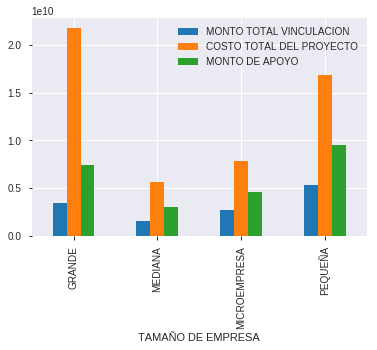

In [4]:
monto_anual.plot(kind='bar')

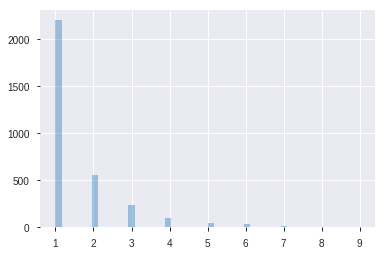

In [5]:
monto_anual_por_tamaño_empresa = \
     pd.pivot_table(df, values='MONTO DE APOYO', index='EMPRESA', 
                             columns='CONVOCATORIA',
                             aggfunc='sum', fill_value=0)
años_de_apoyo_a_empresa = monto_anual_por_tamaño_empresa.replace(0,np.nan).count(axis=1)
sns.distplot(años_de_apoyo_a_empresa, kde=False)
#plt.xlim(2, 10)
plt.show()
#sns.clustermap(monto_anual_por_tamaño_empresa, cmap='rocket_r', col_cluster=False)

In [6]:
años_de_apoyo_a_empresa[años_de_apoyo_a_empresa>5].sort_values(ascending=False)

EMPRESA
LABORATORIOS SILANES, S.A. DE C.V.                                             9
KOPPERT MEXICO SA DE CV                                                        8
CICAINTE S DE RL DE CV                                                         8
LABORATORIOS CRYOPHARMA, S.A. DE C.V.                                          7
SKYWORKS SOLUTIONS DE MEXICO S. DE R.L. DE C.V.                                7
BAYER DE MEXICO, S. A. DE C. V.                                                7
SIGNA, S.A. DE C.V.                                                            7
CONAGRA FOODS MEXICO SA DE CV                                                  7
SANCHEZ S.A. DE C.V.                                                           7
RODAS COMPUTACION SA DE CV                                                     7
INNOVACION Y DESARROLLO DE ENERGIA ALFA SUSTENTABLE SA DE CV                   7
LAPISA SA DE CV                                                                7
NATURA XALLI SA DE C

In [7]:
df.columns

Index(['NUM. DE PROYECTO', 'CONVOCATORIA', 'EMPRESA', 'ENTIDAD DEL PROYECTO',
       'TAMAÑO DE EMPRESA', 'MODALIDAD', 'TÍTULO DEL PROYECTO',
       'AREA INDUSTRIAL', 'SUBSECTOR', 'MONTO TOTAL VINCULACION',
       'COSTO TOTAL DEL PROYECTO', 'MONTO DE APOYO', 'VINCULADO   _INDIVIDUAL',
       'VINCULACION1', 'VINCULACION2', 'VINCULACION3', 'VINCULACION4',
       'VINCULACION5', 'VINCULACION6', 'VINCULACION7', 'VINCULACION8',
       'VINCULACION9', 'VINCULACION10', 'VINCULACION11'],
      dtype='object')

In [8]:
datos_por_empresa = df.groupby('EMPRESA').aggregate({'CONVOCATORIA':pd.Series.nunique,
                                 'MONTO DE APOYO':'sum', 'TAMAÑO DE EMPRESA':'first',
                                 'AREA INDUSTRIAL':'first', 'MODALIDAD':'first',  })
datos_por_empresa.sort_values('MONTO DE APOYO', ascending=False)

,CONVOCATORIA,MONTO DE APOYO,TAMAÑO DE EMPRESA,AREA INDUSTRIAL,MODALIDAD
EMPRESA,,,,,
CONTINENTAL AUTOMOTIVE GUADALAJARA MEXICO SA DE CV,6,199831503.0,GRANDE,Automotriz,INNOVATEC
INTEL TECNOLOGIA DE MEXICO SA DE CV,5,166217488.0,GRANDE,Electrónica,INNOVATEC
KATCON SA DE CV,4,135928172.0,GRANDE,Automotriz,INNOVATEC
RESORTES Y PARTES SA DE CV,6,135758459.0,MEDIANA,Metalmecánica,INNOVAPYME
"LABORATORIOS SILANES, S.A. DE C.V.",9,119191152.0,GRANDE,Biotecnología,INNOVATEC
VOLKSWAGEN DE MEXICO SA DE CV,4,97632255.0,GRANDE,Automotriz,INNOVATEC
RUBIO PHARMA Y ASOCIADOS SA DE CV,4,82914286.0,MEDIANA,Salud,INNOVAPYME
CORROSION Y PROTECCION SA DE CV,5,79551448.0,MEDIANA,Metalurgia,INNOVAPYME
MABE SA DE CV,5,76425742.0,GRANDE,Metalmecánica,PROINNOVA


In [11]:
df[df['EMPRESA']=='MODUTRAM MEXICO SA DE CV']

,NUM. DE PROYECTO,CONVOCATORIA,EMPRESA,ENTIDAD DEL PROYECTO,TAMAÑO DE EMPRESA,MODALIDAD,TÍTULO DEL PROYECTO,AREA INDUSTRIAL,SUBSECTOR,MONTO TOTAL VINCULACION,...,VINCULACION2,VINCULACION3,VINCULACION4,VINCULACION5,VINCULACION6,VINCULACION7,VINCULACION8,VINCULACION9,VINCULACION10,VINCULACION11
950,139060,2010,MODUTRAM MEXICO SA DE CV,JALISCO,PEQUEÑA,PROINNOVA,DESARROLLO DE UN SISTEMA DE TRANSPORTE URBANO ...,Automotriz,334,6811300.0,...,Instituto Tecnológico y de Estudios Superiores...,Instituto Tecnológico y de Estudios Superiores...,Instituto Politécnico Nacional,0,0,0,0,0,0,0
1314,153342,2011,MODUTRAM MEXICO SA DE CV,JALISCO,PEQUEÑA,PROINNOVA,DESARROLLO DE UN SISTEMA DE TRANSPORTE URBANO ...,Electrónica,334,9982750.0,...,"CENTROS CULTURALES DE MEXICO, AC",CONSEJO ECONÓMICO Y SOCIAL DEL ESTADO DE JALIS...,INSTITUTO POLITECNICO NACIONAL,INSTITUTO TECNOLÓGICO Y DE ESTUDIOS SUPERIORES...,INSTITUTO TECNOLOGICO Y DE ESTUDIOS SUPERIORES...,UNIVERSIDAD DE GUADALAJARA,0,0,0,0
2317,196304,2013,MODUTRAM MEXICO SA DE CV,JALISCO,PEQUEÑA,PROINNOVA,DESARROLLO E INTEGRACION DEL SISTEMA DE CONTRO...,Equipo de Medición y Control,334,3239556.0,...,INSTITUTO TECNOLOGICO Y DE ESTUDIOS SUPERIORES...,UNIVERSIDAD DE GUADALAJARA,0,0,0,0,0,0,0,0
3085,211368,2014,MODUTRAM MEXICO SA DE CV,JALISCO,PEQUEÑA,PROINNOVA,DESARROLLO DE APLICACIONES DE SOFTWARE PARA EL...,Tecnologías de la Información,334,454015.0,...,CENTRO DE INVESTIGACION Y DE ESTUDIOS AVANZADO...,0,0,0,0,0,0,0,0,0
4366,222265,2015,MODUTRAM MEXICO SA DE CV,JALISCO,MICROEMPRESA,INNOVAPYME,REINGENIERIA DEL VEHICULO ELECTRICO GRT AUTOTR...,Automotriz,336,1461600.0,...,CINVESTAV UNIDAD GUADALAJARA,0,0,0,0,0,0,0,0,0
4798,230867,2016,MODUTRAM MEXICO SA DE CV,JALISCO,MICROEMPRESA,PROINNOVA,REINGENIERÍA DEL VEHÍCULO ELÉCTRICO GRT AUTOTR...,Automotriz,336,3427800.0,...,CINVESTAV Unidad Guadalajara,0,0,0,0,0,0,0,0,0
